Description of the dataset, where is was downloaded from

This dataset was obtained from Kaggle. It is looking at the effect of immunisation, mortality factors, economic, social and other health related factors in several countries from the years 2000-2015. This was tracked by the WHO. 

What is the problem were going to investigate in the data?
   - Our issue is to understand the relationship between the GDP and life expectancy of 6 countries. 
   - Does GDP correlate with life expectancy in a positive way, negative way or at all?

   Why might also see:
   - Is there a disparity between what would be considered developed/developing countries irrespective of GDP?
   - We have a time factor, can we identify the effect of the economic crisis of 2008?


In [1]:
#lets install the perquisite packages 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#First were going to look at the columns and their contents. 
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.info())
print(df.Country.unique())
print(df.Country.value_counts())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimba

We have four columns, 96 rows with no missing data. The column names have spaces and capitals so I'm going to rename them as spaces will be awkward for coding. 

Our columns types are all correct as well so no need to change them.

In terms of countries we have:
 developed: Germany, USA, China
 developing: Chile, Mexico, Zimbabwe
There is also and even count of the countries.

In [4]:
df = df.rename(columns={'Country':'country','Year':'year', 'Life expectancy at birth (years)':'life_expectancy','GDP':'gdp'})
print(df.columns) #checking the columns were renamed correctly

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')


First question to tackle: 
Does GDP correlate with life expectancy in a positive way, negative way or at all? Life expectancy and GDP are both continuous variables so the visualisation to begin with is: 
- a line plot to understand the effect over time. 
We will also separate these out based on country to enable us to make some comments.

In [5]:
#creating an interactive graph so we can clearly check the GDP at certain points. 
fig = px.line(df, x= 'year', y = 'gdp', line_group='country', color = 'country',title = "Plot of a Country's GDP across 15 years")
fig.update_layout(xaxis_title = 'Year', yaxis_title = 'GDP')
fig.show()

We can see in the graph that the US has the highest GDP of the countries and has experienced continuous economic growth. We can notice a slight dip in growth after 2008 which was the time of the recession which is a reliable indicator. 

The three developed countries do take the top three spots overall, however of the 3 Germany has barely increased its GDP while China has 10x the GDP at the end compared to the start.

Meanwhile the three developing countries don't appear to achieve any economic growth with only Mexico reaching the trillion mark. 

Will life expectancy be reflected in that higher income countries have better life expectancy overall and did it increase with GDP? 

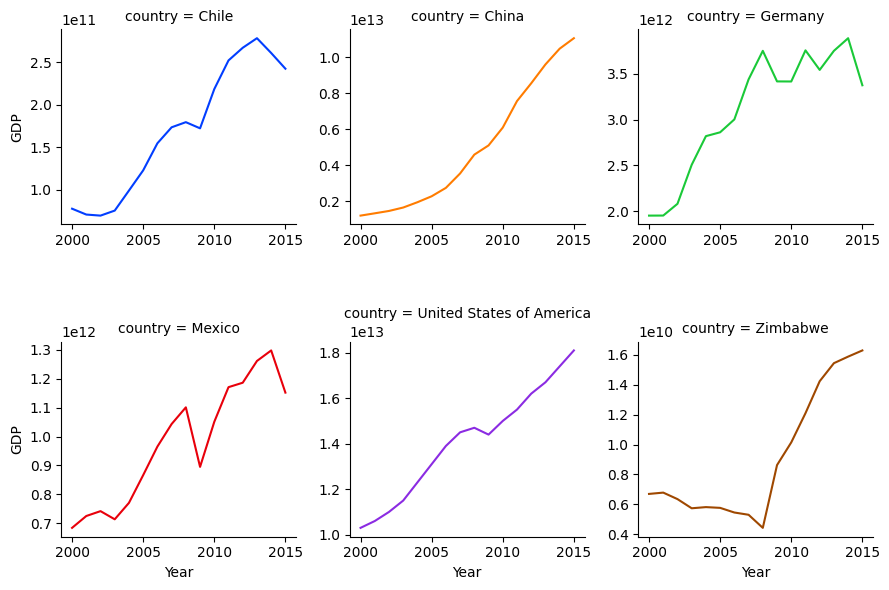

In [30]:
plot = sns.FacetGrid(df, col='country', hue='country', palette='bright', col_wrap=3, sharey=False, sharex= False)
plot.map(sns.lineplot, 'year', 'gdp')
plot.set_axis_labels('Year', 'GDP')
plot.fig.subplots_adjust(hspace=0.6)
plt.show()

When we separate out the countries individually we can see in much greater detail the change in GDP that is lost in the combined graph. 
We can see that all country's GDP except for China were affected by the economic crash. China's economy is run differently to other countries so would have played a role in attenuating the effect. 

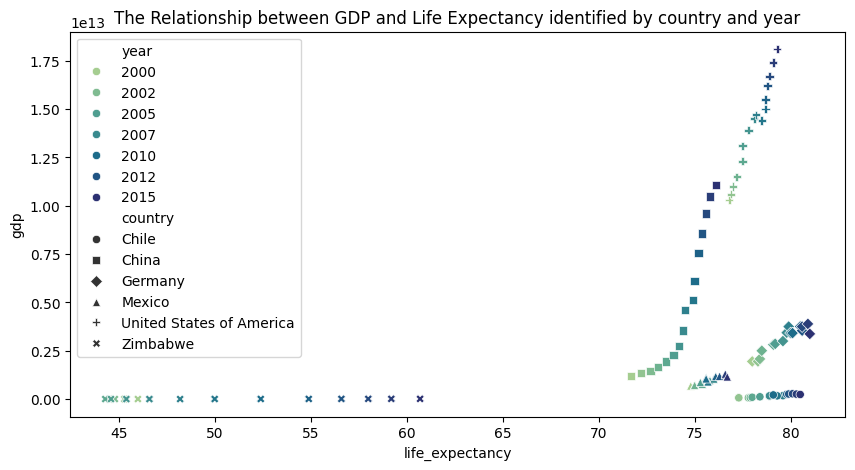

In [38]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= 'life_expectancy', y = 'gdp', data=df, hue = 'year', style= 'country', markers = ['o','s','D','^','P','X'], palette="crest")
plt.title('The Relationship between GDP and Life Expectancy identified by country and year')
plt.show()

Lets look at the developing countries first as their GDP is low and didn't really experience growth. 
- Zimbabwe(ⅹ)  has experienced the biggest difference in terms of life expectancy. The first few years it circles around 45 mark but then around 2007 it starts to jump dramatically. GDP is not responsible for the increase in life expectancy here. The full CSV would likely reveal more. 
- Chile(⏺) also experienced no economic growth but are nearly identical with two developed countries, USA(+) and Germany(◆). GDP isn't responsible for life expectancy here, it also hasn't changed too much. Could it be attributed to lifestyle factors such as diet, medical practices in the country etc. 
- Mexico(▲) is the only of the developing countries to reach the trillions(2008) and experience some gain in GDP. It too has a relatively high life expectancy around 75 and despite having the highest income it doesn't have the highest expectancy. Perhaps the country isn't investing this money in healthcare?

Now the developed countries: 
- Germany(◆) didn't appear to experience any gain but its life expectancy did increase. Expectancy was already high to begin with, perhaps it was the increase in awareness of lifestyle factors influencing this increase?
- China's(▫️) growth in GDP is much more dramatic in this view. Despite the growth expectancy didn't change too much. Thus we can't say for sure from the graph if GDP is responsible. 
- Growth in the US(+) is also clear. We can again see the dip of the 2008 crisis but life expectancy didn't decrease. The US seems to have improved it's life expectancy the least overall. 

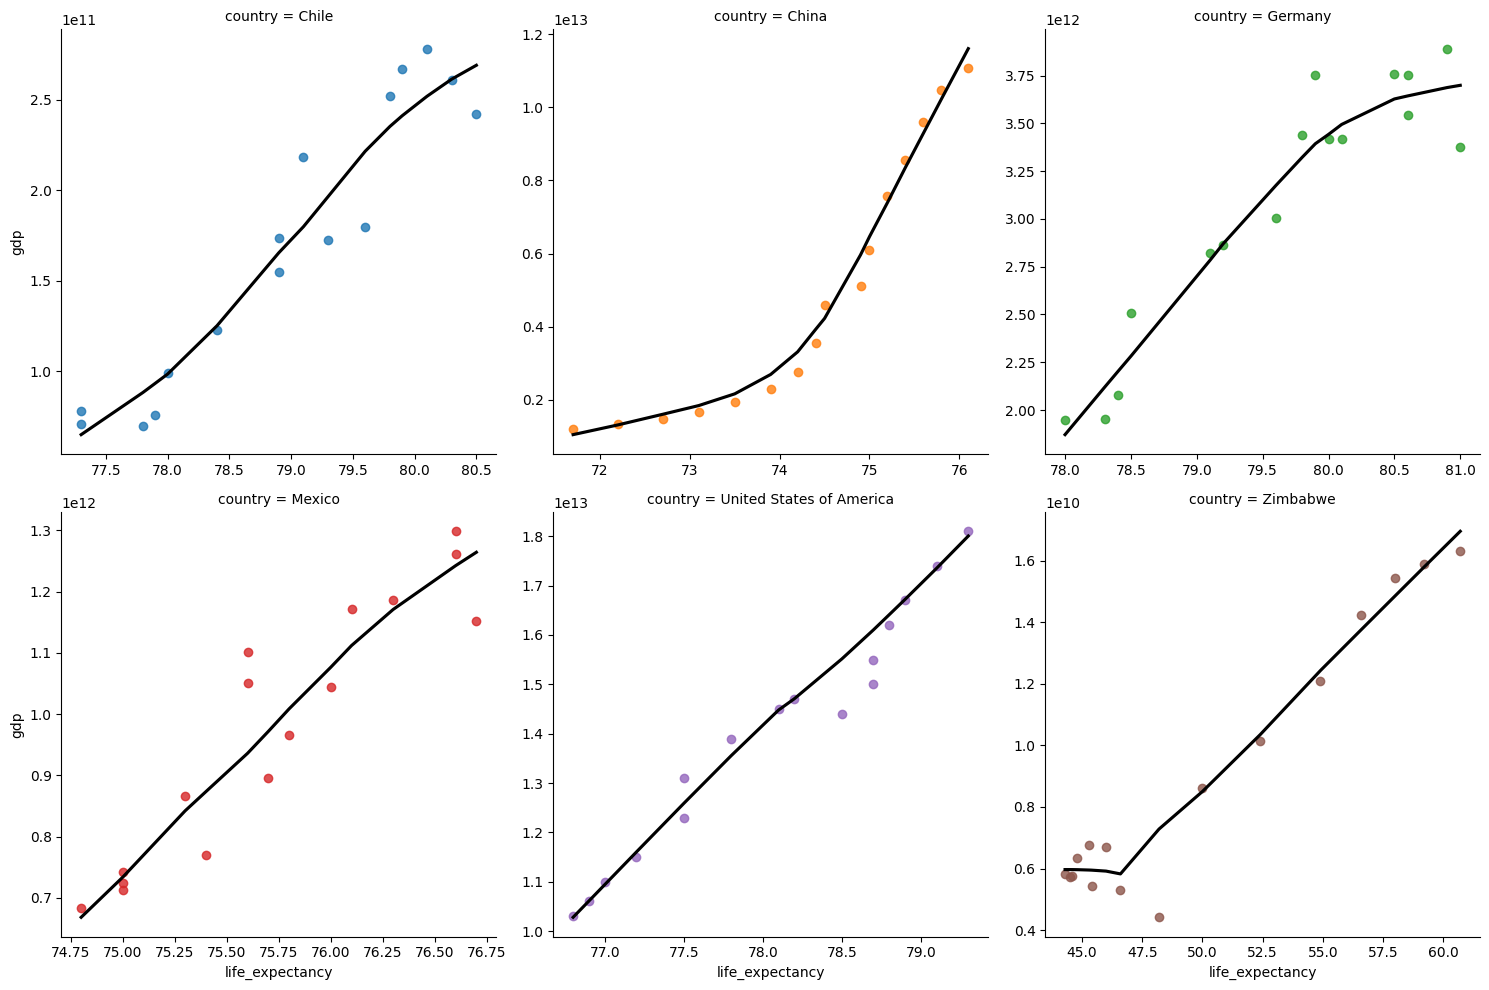

In [31]:
sns.lmplot(x = 'life_expectancy', y = 'gdp', data = df, line_kws={'color':'black'}, lowess = True, col = 'country', col_wrap=3,facet_kws={'sharex':False, 'sharey':False} , hue = 'country')

In this graph the LOWESS line tells us that as GDP increases so does life expectancy. The best way to understand if there is a statistically significant relationship would be through a linear regression model where we can get the slope that will tell us by how much the variable increases, the strength through r^2 and a p-value. 

Conclusions:
Through this analysis we discovered that:
- All countries but China suffered a decline in GPD after the recession. 
- An increase in GDP comes with an increase in life expectancy, even if GDP only increases slightly as seen in Zimbabwe. 

If i were to repeat this project in the future I would include hypothesis testing to understand if an increase in GDP is significantly related to life expectancy but that is beyond the scope of this project and this time. 